# ANÁLISE DE PORTFÓLIOS

In [3]:
import jupyter_core  # opcional
import notebook  # opcional
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import yfinance as yfin
yfin.pdr_override()
import matplotlib.pyplot as plt

In [4]:
ativos = ['WEGE3.SA', 'MGLU3.SA', 'VALE3.SA', 'ABEV3.SA', 'CIEL3.SA']

portfolio = pd.DataFrame()  # criamos um DataFrame a ser populado

for ativo in ativos:  # loop para popular o DataFrame
    portfolio[ativo] = wb.get_data_yahoo(ativo, start='2020-1-1', end='2023-4-12')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


## Vamos analisar o DataFrame em busca de inconsistências:

In [5]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 813 entries, 2020-01-02 to 2023-04-10
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   WEGE3.SA  813 non-null    float64
 1   MGLU3.SA  813 non-null    float64
 2   VALE3.SA  813 non-null    float64
 3   ABEV3.SA  813 non-null    float64
 4   CIEL3.SA  813 non-null    float64
dtypes: float64(5)
memory usage: 38.1 KB


In [6]:
portfolio.tail()

,WEGE3.SA,MGLU3.SA,VALE3.SA,ABEV3.SA,CIEL3.SA
Date,,,,,
2023-04-03,39.590000,3.31,80.309998,14.33,4.67
2023-04-04,39.630001,3.22,78.040001,14.43,4.71
2023-04-05,38.750000,3.28,76.889999,14.40,4.70
2023-04-06,38.610001,3.37,76.750000,14.43,4.68
2023-04-10,38.389999,3.35,78.230003,14.46,4.68


## Tramento de dados ("linechart"):

In [8]:
portfolio.iloc[0]  
# criamos um 'linechart' através do método 'iloc'
# o método transpõe os dados da primeira linha para a primeira coluna da tabela
# 'iloc[0]' indica como posição de interesse a primeira linha

WEGE3.SA    16.858402
MGLU3.SA    12.029736
VALE3.SA    39.578938
ABEV3.SA    17.020622
CIEL3.SA     7.472491
Name: 2020-01-02 00:00:00, dtype: float64

## Plotagem gráfica do histórico de preços:

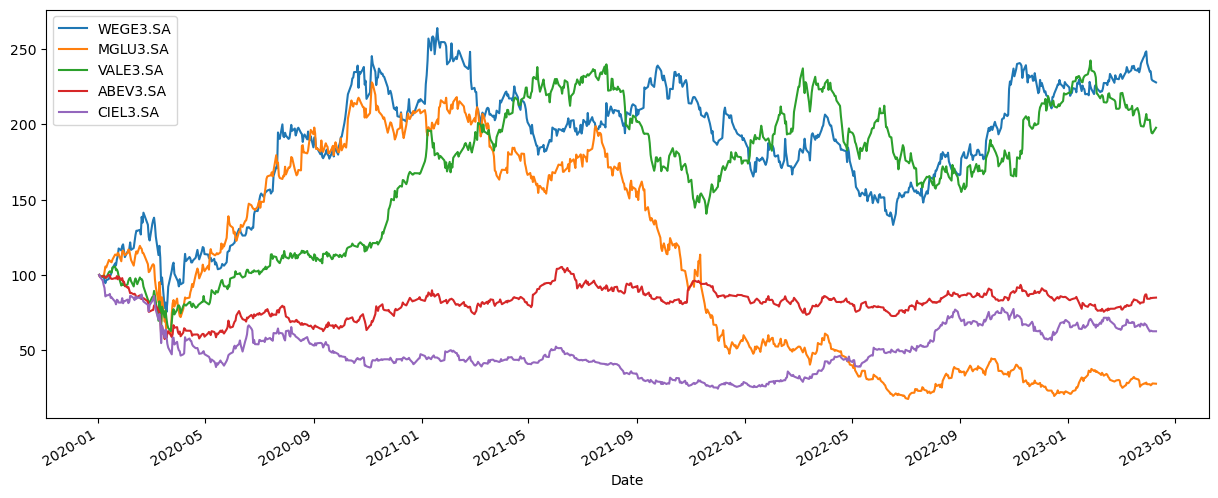

In [9]:
(portfolio / portfolio.iloc[0] * 100).plot(figsize= (15,6));
plt.show()

_________

## Cálculo de Retorno sobre Portfolio:

### Aplicar a fórmula de Normalização para 100:

     F O R M U L A 

### (pT/p0)*100

onde:

pT = preço em determinado tempo

p0 = preço inicial

In [10]:
# retorno diário (só serve como insumo produtivo da conta, não tem valor científico por si só)
retorno_d = (portfolio / portfolio.shift(1)) -1
retorno_d.tail()

,WEGE3.SA,MGLU3.SA,VALE3.SA,ABEV3.SA,CIEL3.SA
Date,,,,,
2023-04-03,-0.023674,0.000000,0.000249,0.000000,-0.046939
2023-04-04,0.001010,-0.027190,-0.028265,0.006978,0.008565
2023-04-05,-0.022205,0.018634,-0.014736,-0.002079,-0.002123
2023-04-06,-0.003613,0.027439,-0.001821,0.002083,-0.004255
2023-04-10,-0.005698,-0.005935,0.019283,0.002079,0.000000


In [11]:
# array com distribuição de pesos do portfolio
peso = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [12]:
# retorno anual
retorno_a = retorno_d.mean() * 251
# 251 dias úteis em média em SP
retorno_a

WEGE3.SA    0.347407
MGLU3.SA   -0.145718
VALE3.SA    0.300548
ABEV3.SA    0.007972
CIEL3.SA    0.013956
dtype: float64

In [13]:
# calcula o produto do vetor ou matriz
pfolio_1 = str(round(np.dot(retorno_a, peso), 5) * 100) + ' %'
print(pfolio_1)
# Com distribuição equânime de 20% dos recursos, temos um retorno anual médio de:

10.483 %


In [14]:
# Redistribuição de pesos
peso_2 = np.array([0.3, 0.1, 0.25, 0.2, 0.15])

In [15]:
pfolio_2 = str(round(np.dot(retorno_a, peso_2), 5) * 100) + ' %'19
print(pfolio_2)

16.847 %
